В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



[process_bank_churn.py](https://github.com/ElenaKzm/Python-for-DS/blob/main/process_bank_churn.py)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree, export_text

In [121]:
from process_bank_churn import preprocess_data, preprocess_new_data

df = pd.read_csv('bank-customer-churn-prediction-dlu-course-c-2/train.csv')

In [123]:
datasets = preprocess_data(df, scaler_numeric = False)

In [125]:
train_df = datasets['train_X']
val_df = datasets['val_X']
train_y = datasets['train_y']
val_y = datasets['val_y']
encoder = datasets['encoder']
poly = datasets['poly']
input_cols = ['input_cols']

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [67]:
model = DecisionTreeClassifier(random_state=42)

In [69]:
%%time
model.fit(train_df, train_y)

CPU times: user 10.3 s, sys: 54 ms, total: 10.3 s
Wall time: 10.3 s


DecisionTreeClassifier(random_state=42)

In [75]:
def calculate_roc_auc(model, X, y):
    y_probs = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_probs)
    roc_auc = auc(fpr, tpr)    
    return roc_auc

In [77]:
print(f"Area under ROC score on train dataset: {calculate_roc_auc(model, train_df, train_y):.5f}")
print(f"Area under ROC score on validation dataset: {calculate_roc_auc(model, val_df, val_y):.5f}")

Area under ROC score on train dataset: 1.00000
Area under ROC score on validation dataset: 0.76687


Модель перенавчена - вона "вивчила" закономірності на тренувальному датасеті але дуже погано прогнозує на валідаційному.

Глибина дерева:

In [79]:
model.tree_.max_depth

27

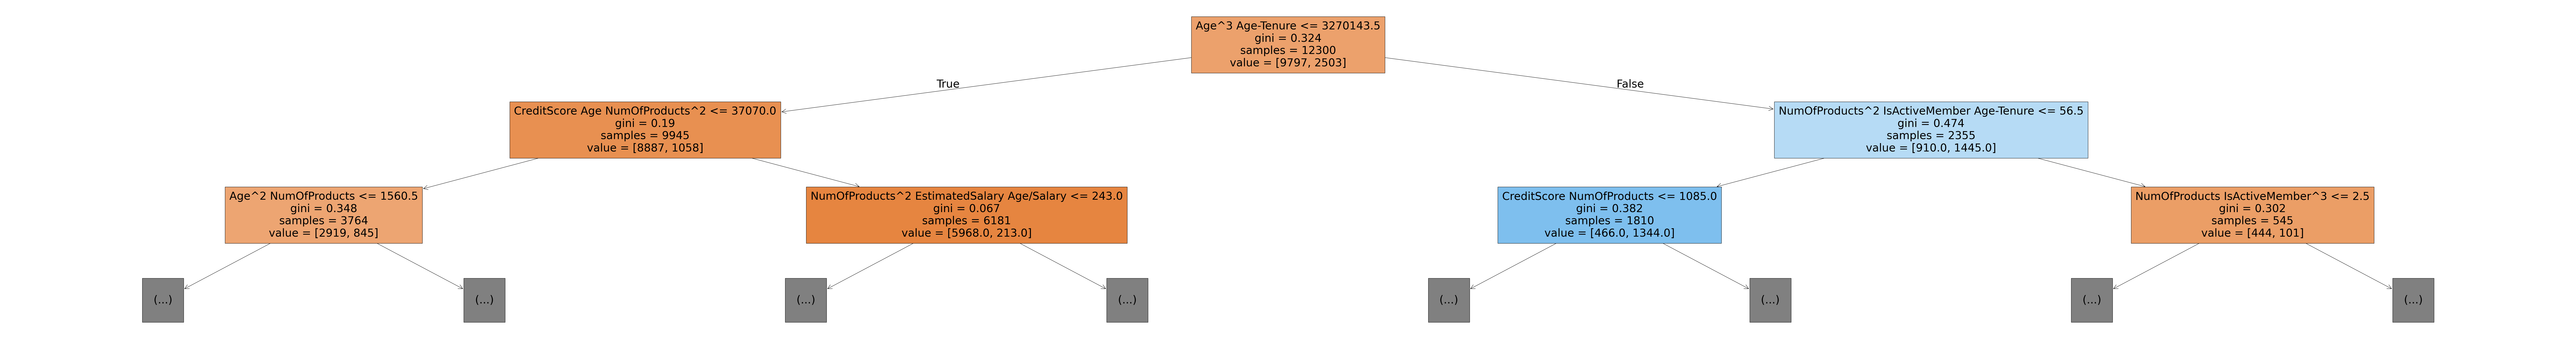

In [81]:
plt.figure(figsize=(150,20))
plot_tree(model, feature_names=train_df.columns, max_depth=2, filled=True);

In [83]:
importance_df = pd.DataFrame({
    'feature': train_df.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [85]:
importance_df.head(10)

,feature,importance
827,Age^3 Age-Tenure,0.250564
1508,NumOfProducts^2 IsActiveMember Age-Tenure,0.065236
171,Age^2 NumOfProducts,0.053136
562,CreditScore Age NumOfProducts^2,0.042376
1512,NumOfProducts^2 EstimatedSalary Age/Salary,0.033778
611,CreditScore Tenure Balance IsActiveMember,0.014665
1820,Geography_Germany,0.014253
16,CreditScore NumOfProducts,0.012215
1553,NumOfProducts IsActiveMember^3,0.012072
514,CreditScore^2 IsActiveMember Age/Salary,0.007872


Найважливішими є сгенеровані поліноміальні ознаки.

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [103]:
model = DecisionTreeClassifier(random_state=42, max_depth = 10, max_leaf_nodes = 30)
model.fit(train_df, train_y)

print(f"Area under ROC score on train dataset: {calculate_roc_auc(model, train_df, train_y):.5f}")
print(f"Area under ROC score on validation dataset: {calculate_roc_auc(model, val_df, val_y):.5f}")

Area under ROC score on train dataset: 0.92314
Area under ROC score on validation dataset: 0.92078


Модель не перенавчена.

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [91]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train_df, train_y)
    train_auroc = calculate_roc_auc(model, train_df, train_y)
    val_auroc = calculate_roc_auc(model, val_df, val_y)
    return {'Max Depth': md, 'Training auroc': train_auroc, 'Validation auroc': val_auroc}

In [93]:
%%time
auroc_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 2min 9s, sys: 1.71 s, total: 2min 11s
Wall time: 2min 11s


In [97]:
auroc_df.style.background_gradient(subset='Validation auroc')

,Max Depth,Training auroc,Validation auroc
0,1,0.742211,0.734736
1,2,0.846844,0.841006
2,3,0.892490,0.899187
3,4,0.909005,0.911720
4,5,0.923480,0.920712
5,6,0.932736,0.915923
6,7,0.940651,0.893827
7,8,0.951089,0.870683
8,9,0.959750,0.848584
9,10,0.967466,0.819416


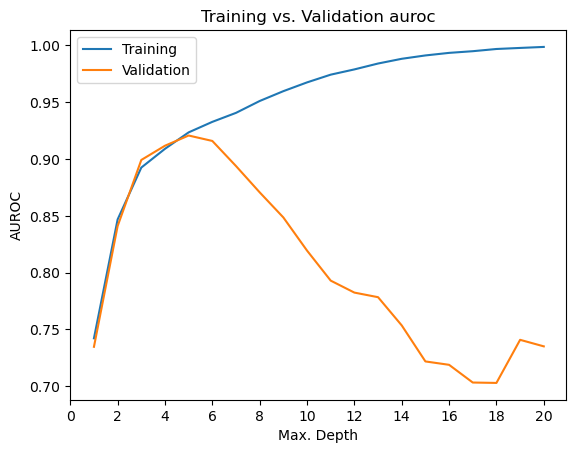

In [99]:
plt.figure()
plt.plot(auroc_df['Max Depth'], auroc_df['Training auroc'])
plt.plot(auroc_df['Max Depth'], auroc_df['Validation auroc'])
plt.title('Training vs. Validation auroc')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('AUROC')
plt.legend(['Training', 'Validation']);

З таблиці та графіку видно що найвищого значення AUROC на валідаційному датасеті досягає при max_depth = 5.

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [101]:
model = DecisionTreeClassifier(random_state=42, max_depth = 5, max_leaf_nodes = 30)
model.fit(train_df, train_y)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=30, random_state=42)

In [127]:
test_raw_df = pd.read_csv('bank-customer-churn-prediction-dlu-course-c-2/test.csv')

In [129]:
test_df = preprocess_new_data(test_raw_df, encoder, poly, scaler = None, scaler_numeric = False)['test_X']

In [110]:
def predict_test(model, inputs: pd.DataFrame):
    preds = model.predict(inputs)
    y_pred_proba = model.predict_proba(inputs)[:, 1]
    return y_pred_proba

In [112]:
test_raw_df['Exited'] = predict_test(model, test_df)

In [58]:
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.219178
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,0.014872
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,0.014872
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.797794
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.014872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65,0.014872
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50,0.014872
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72,0.014872
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09,0.046812


In [117]:
sample_submission = pd.read_csv('bank-customer-churn-prediction-dlu-course-c-2/sample_submission.csv')
sample_submission['Exited'] = test_raw_df['Exited']
sample_submission.head()
sample_submission.to_csv('submission_tree.csv', index=False)

![Score](kaggle_score_tree.png)